## Step 1: Load Data
We start by downloading and loading the dataset `data_ffnn.txt`. The file consists of three columns: `x1`, `x2`, and `y`. This is a multi-class problem.


In [9]:
import pandas as pd

# Load the data
file_path = "data_ffnn.txt"  # Ensure this file is in your working directory
data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])

# Display the first few rows
print(data.head())


         x1        x2  y
0  0.015546  0.807941  3
1  0.004527  1.426791  3
2  1.358103  1.193950  3
3  1.372911  0.218337  3
4  0.236595  0.281448  3


C:\Users\tompa\AppData\Local\Temp\ipykernel_17600\3672706578.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=0, names=['x1', 'x2', 'y'])


## Step 2: Plot the Data
Visualize the data in 2D, coloring each point according to its class.


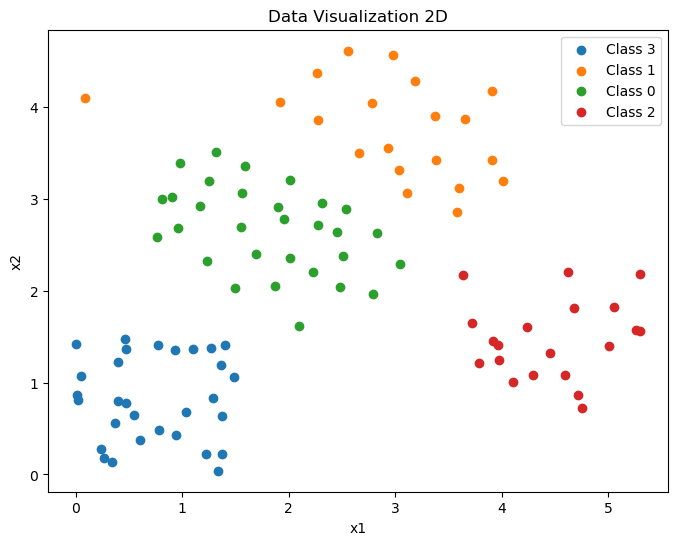

In [10]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(8, 6))
for label in data['y'].unique():
    subset = data[data['y'] == label]
    plt.scatter(subset['x1'], subset['x2'], label=f'Class {label}')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Visualization 2D')
plt.legend()
plt.show()


## Step 3: Forward Propagation
We implement forward propagation for a feedforward neural network with three layers. The hidden layer will have `K` neurons.


In [12]:
import numpy as np
import pandas as pd  # Pour afficher des matrices sous forme de tableaux lisibles

# Définir les taux d'apprentissage
alpha_1, alpha_2 = 10**-3, 10**-3

# Définir les nombres de neurones dans chaque couche
N = 2  # Neurones d'entrée (features)
K = 4  # Neurones dans la couche cachée
J = len(data['y'].unique())  # Nombre de classes en sortie

# Initialisation des poids
V = np.random.randn(N + 1, K)
W = np.random.randn(K + 1, J)

# Seuil d'arrêt
threshold = 10**-2

# Préparer les données d'entrée
X = data[['x1', 'x2']].values
X_bar = np.hstack((np.ones((data.shape[0], 1)), data[['x1', 'x2']].values))

# Propagation avant (Forward Propagation)
# Couche cachée
X_bar_bar = np.dot(X_bar, V)
F = 1 / (1 + np.exp(-X_bar_bar))  # Activation sigmoïde
F_bar = np.hstack((np.ones((F.shape[0], 1)), F))  # Ajouter le biais
F_bar_bar = np.dot(F_bar, W)

# Couche de sortie
G = 1 / (1 + np.exp(-F_bar_bar))  # Activation sigmoïde (sortie)

# Calcul de l'erreur (SSE)
y_one_hot = np.eye(J)[data['y'].astype(int)]
E = 0.5 * np.sum((G - y_one_hot) ** 2)


### Affichage des matrices

In [8]:
# Affichage des résultats
def display_matrix(name, matrix):
    """Affiche une matrice avec un nom sous forme de DataFrame."""
    print(f"\n{name}:")
    display(pd.DataFrame(matrix))

# Appeler la fonction d'affichage pour chaque matrice
display_matrix("X (Entrées sans biais)", X)
display_matrix("X_bar (Entrées avec biais)", X_bar)
display_matrix("V (Poids de l'entrée vers la couche cachée)", V)
display_matrix("X_bar_bar (Produit X_bar . V)", X_bar_bar)
display_matrix("F (Sorties de la couche cachée sans biais)", F)
display_matrix("F_bar (Sorties de la couche cachée avec biais)", F_bar)
display_matrix("W (Poids de la couche cachée vers la couche de sortie)", W)
display_matrix("F_bar_bar (Produit F_bar . W)", F_bar_bar)
display_matrix("G (Sorties de la couche de sortie)", G)

# Affichage de l'erreur
print(f"\nE (Erreur SSE): {E}")



X (Entrées sans biais):


,0,1
0,0.015546,0.807941
1,0.004527,1.426791
2,1.358103,1.193950
3,1.372911,0.218337
4,0.236595,0.281448
...,...,...
95,4.748300,0.725100
96,4.291600,1.085700
97,4.712600,0.864000
98,4.100500,1.005800



X_bar (Entrées avec biais):


,0,1,2
0,1.0,0.015546,0.807941
1,1.0,0.004527,1.426791
2,1.0,1.358103,1.193950
3,1.0,1.372911,0.218337
4,1.0,0.236595,0.281448
...,...,...,...
95,1.0,4.748300,0.725100
96,1.0,4.291600,1.085700
97,1.0,4.712600,0.864000
98,1.0,4.100500,1.005800



V (Poids de l'entrée vers la couche cachée):


,0,1,2,3
0,-0.329673,0.904084,-1.303185,-0.203488
1,-0.515006,0.988789,-0.142042,-0.426631
2,-0.150860,-0.900758,-0.398469,-0.447503



X_bar_bar (Produit X_bar . V):


,0,1,2,3
0,-0.459565,0.191697,-1.627332,-0.571677
1,-0.547250,-0.376633,-1.872359,-0.843913
2,-1.209223,1.171501,-1.971845,-1.317194
3,-1.069669,2.064935,-1.585197,-0.886921
4,-0.493980,0.884511,-1.448939,-0.430375
...,...,...,...,...
95,-2.884463,4.946012,-2.266573,-2.553745
96,-2.703660,4.169619,-2.345391,-2.520272
97,-2.887032,4.785597,-2.316850,-2.600672
98,-2.593189,4.052632,-2.286409,-2.402987



F (Sorties de la couche cachée sans biais):


,0,1,2,3
0,0.387089,0.547778,0.164196,0.360850
1,0.366503,0.406939,0.133269,0.300711
2,0.229839,0.763416,0.122191,0.211286
3,0.255466,0.887448,0.170061,0.291746
4,0.378956,0.707756,0.190165,0.394037
...,...,...,...,...
95,0.052927,0.992939,0.093929,0.072175
96,0.062758,0.984777,0.087433,0.074449
97,0.052798,0.991720,0.089737,0.069095
98,0.069578,0.982920,0.092255,0.082945



F_bar (Sorties de la couche cachée avec biais):


,0,1,2,3,4
0,1.0,0.387089,0.547778,0.164196,0.360850
1,1.0,0.366503,0.406939,0.133269,0.300711
2,1.0,0.229839,0.763416,0.122191,0.211286
3,1.0,0.255466,0.887448,0.170061,0.291746
4,1.0,0.378956,0.707756,0.190165,0.394037
...,...,...,...,...,...
95,1.0,0.052927,0.992939,0.093929,0.072175
96,1.0,0.062758,0.984777,0.087433,0.074449
97,1.0,0.052798,0.991720,0.089737,0.069095
98,1.0,0.069578,0.982920,0.092255,0.082945



W (Poids de la couche cachée vers la couche de sortie):


,0,1,2,3
0,-0.433596,1.462167,-1.211716,0.816010
1,1.200873,-0.327108,1.128607,-1.501711
2,-1.607185,0.024932,0.051215,0.769140
3,0.802713,-0.825888,1.622773,1.860296
4,-0.870078,-0.247596,-1.081277,-0.955034



F_bar_bar (Produit F_bar . W):


,0,1,2,3
0,-1.031297,1.124252,-0.870516,0.616862
1,-0.802165,1.167907,-0.886124,0.539353
2,-1.470291,1.252789,-0.943390,1.083560
3,-1.670438,1.188042,-0.917432,1.152682
4,-1.306207,1.101236,-0.865244,0.768735
...,...,...,...,...
95,-1.953273,1.374164,-1.026744,1.606045
96,-1.935544,1.375548,-1.029069,1.570747
97,-1.952154,1.378401,-1.030425,1.600443
98,-1.927891,1.367184,-1.022828,1.559933



G (Sorties de la couche de sortie):


,0,1,2,3
0,0.262833,0.754777,0.295147,0.649505
1,0.309563,0.762766,0.291910,0.631662
2,0.186898,0.777782,0.280216,0.747167
3,0.158366,0.766391,0.285481,0.760001
4,0.213122,0.750492,0.296245,0.683247
...,...,...,...,...
95,0.124197,0.798052,0.263716,0.832862
96,0.126138,0.798275,0.263265,0.827890
97,0.124319,0.798734,0.263002,0.832080
98,0.126984,0.796925,0.264477,0.826344



E (Erreur SSE): 65.66462496631483


In [ ]:
for it in range(iterations):
    # Propagation avant (Forward Propagation)
    Z_hidden = np.dot(X_bar, V)
    F_hidden = 1 / (1 + np.exp(-Z_hidden))  # Activation sigmoïde
    F_bar = np.hstack((np.ones((F_hidden.shape[0], 1)), F_hidden))  # Ajouter le biais
    Z_output = np.dot(F_bar, W)
    G = 1 / (1 + np.exp(-Z_output))  # Activation sigmoïde (sortie)

    # Calcul de l'erreur (SSE)
    E = 0.5 * np.sum((G - y_one_hot) ** 2)
    errors.append(E)